# Predict the probability of Purchase, given the User profile data


In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'F:\MODULE 3')
os.listdir()

['datasets-master',
 'feeee.pdf',
 'Lecture 02 Material-20220315',
 'Lecture 03 material-20220321',
 'Lecture 04 material-20220323',
 'Lecture 05 Material-20220324',
 'Multiple-Linear-Regression-master',
 'multiplelinearregression.py',
 'py-master',
 'simple-Linear-Regression-master',
 'simplelinearregression.py',
 'Supervised and unsupervised learning_v1.pptx.pdf',
 'User_Data.csv']

In [3]:
df=pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Correalation matrix

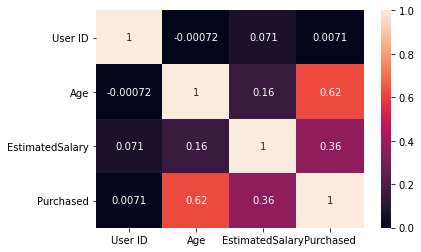

In [6]:
corr=df.corr()
sns.heatmap(corr,annot=True);

# Dropping unwanted columns

In [7]:
df.drop('User ID',axis=1,inplace=True)

In [8]:
df.drop('Gender',axis=1,inplace=True)

# Test,train splitting

In [9]:
x=df.loc[:,df.columns!='Purchased']
y=df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model= LogisticRegression()

# Scaling the feature

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
from sklearn.metrics import accuracy_score

# Confusion matrix

In [20]:
confusion_matrix(y_test,y_pred)

array([[43,  5],
       [10, 22]], dtype=int64)

In [21]:
# True Negatives are 43
# True positives are 22
# False positives are 10
# False Negatives are 5

# Accuracy

In [22]:
accuracy_score(y_test,y_pred)

0.8125

In [23]:
accuracy_score(y_test,y_pred)

0.8125

# ROC Curve

In [30]:
probs = model.predict_proba(x_test)
preds = probs[:,1]
preds

array([2.82712711e-02, 1.39206141e-01, 4.39373357e-01, 6.32205298e-01,
       8.74594446e-02, 1.32728665e-01, 1.13141835e-03, 7.96470374e-01,
       5.65740406e-03, 9.59654965e-01, 7.97055712e-02, 2.04739553e-01,
       9.65448331e-02, 9.41675141e-01, 8.73657016e-01, 9.89441485e-01,
       9.69033137e-01, 1.14328783e-02, 4.20492466e-02, 9.84925787e-01,
       2.55536019e-01, 8.22848408e-01, 9.04742800e-01, 3.01899231e-01,
       1.28169045e-01, 1.76818034e-03, 8.35923744e-01, 6.86362505e-01,
       5.18445296e-01, 9.50896161e-01, 7.18842764e-02, 4.30616416e-03,
       5.13741828e-03, 9.21597259e-01, 3.06993864e-02, 4.84796927e-02,
       8.57755625e-04, 8.91415803e-02, 2.49917234e-01, 5.99085337e-04,
       9.55858621e-01, 9.76352426e-01, 3.14272896e-01, 6.75747791e-03,
       8.47050347e-01, 2.15112122e-01, 2.81281501e-01, 8.66925562e-01,
       2.45187369e-01, 5.04667094e-01, 6.11930417e-03, 7.22822903e-02,
       3.88102811e-01, 1.63883025e-01, 3.25957654e-01, 9.94435973e-02,
      

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


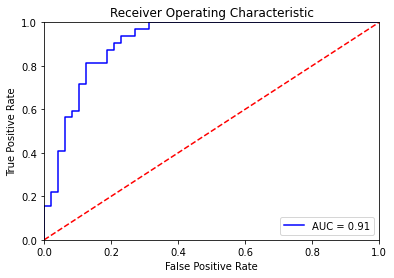

In [25]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

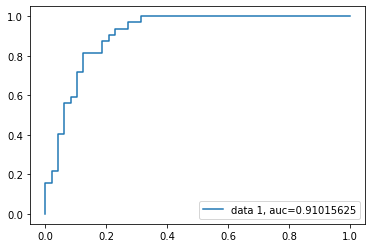

In [26]:

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
import sklearn.metrics as metrics
probbs=model.predict_proba(x_test)
predd=probbs[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,predd)
auc=metrics.auc(fpr,tpr)